# **KWH Prediction Report**
### ***Goal**: Build a model that predicts electricity consumption*

## **Approach**:
1. Explore and understand the dataset
2. Data Engineering: Cleaning / Feature Engineering / Pipeline
3. Baseline model (Linear Regression)
4. Evaluate, adjust pipeline & test various models
5. Bonus

**General Comment**: <br>
One of the challenges with this data was understanding and forming an assumption around what features you would have access to when predicting the target variable.  

# **Findings:**



## 1. **EDA**

For this model we will be using the [2009 RESIDENTIAL ENERGY CONSUMPTION SURVEY (RECS) Survey Data](https://www.eia.gov/consumption/residential/data/2009/index.php?view=microdata). This is data collected by the U.S. Energy Information Administration. 

Data Tables:
| File Name                      	| Shape        	| Description                                                   	|
|--------------------------------	|--------------	|---------------------------------------------------------------	|
| [recs2009_public.csv](https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public.csv)            	| (12083, 940) 	| Sample represents 113.6 million U.S. households in 2009       	|
| [public_layout.csv](https://www.eia.gov/consumption/residential/data/2009/csv/public_layout.csv)              	| (940, 5)     	| Descriptive labels and formats for each data variable         	|
| [recs2009_public_repweights.csv](https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public_repweights.csv) 	| (12083, 246) 	| Replicate weights for each of the 12,083 RECS household cases 	|

For the timeline of this mini project I focused on using the first 2 tables. However, for model improvement I would look at utilizing data from the weights table to test for improvements in the model.


### **Inital Data Comments**:
[public table](https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public.csv) 
![public table](../output/content/data_ex1.jpg)


1. As there are 940 columns we need to be more programmatic to how we handle data. Taking the time to review each feature would be a large investment and in the business would usually we would leverage an SME for to expedite understanding as project is being done. 

2. There is dataleak around the target variable which needed investigation

3. There are many columns with multicollinearity 

4. Data types should be confirmed for modeling (categorical, continuous, ordinal, nominal etc)

5. What features will be available for prediction? This was probably the hardest to answer, thus working to understand the data was critical for this model.


### **Target Variable:** 'KWH'

Through exploring the data it was found that there are other columns which are subsets of the target variable. 

<img src="../output/content/target_dropvars.png" width="400">

**Assumption**: We would not have access to this data when making the prediction due to it being dependent on the target variable of KWH. Anything following this logic was dropped as part of data processing.

<br>

### **-2 Values:** There are a lot of them
There was a lot of occurrences of -2 in many columns. The below example shows column names and their count of -2 values. Remembering that there is 12083 rows in this dataset, many columns contain -2 as most of their values. 

<img src="../output/content/neg_list.png" width="200">

<br>

Most of these columns are data that is only collected in some observations. For example, the "AGEHHMEMCAT14" feature indicates if there is a 14th household member. Most household members do not have 14 people and thus, "-2" is input. 

**Assumption**: when -2 is present in large quantities for a feature, it represents a *NULL* value. For the pipeline of this model I removed columns where most of the data was *NULL*

<br>

### **Low Unique Value Count:**
In my search to understand the data I was investigating columns that were potentially Ordinal or Nominal. I discovered that many columns are flags as also seen in the "-2" example above.  

<img src="../output/content/neg_example1.png" width="500">

<br>


### **High Unique Value Count:**
After some basic processing, showing columns with the highest unique value count helped identify additional columns that may need to be investigated.

<img src="../output/content/h_val_count.jpg" width="500">

For example, after dropping the '*BTUEL*' column (which was another measure of the target variable), I found that 'TOTALBTU' was another column which should have been dropped due to its dependency on knowing the target variable of KWH.

<br>

## 2. **Pipeline**

As it stands in this version of the project:

1. Basic cleaning
2. Encode categorical
3. Drop ID columns
4. Drop target variable dependent columns
5. Remove columns with multicollinearity
6. Remove columns with more than 40% null values.
7. Save transformed data to csv

## 3/4. **Modeling**

### **Baseline Model:** Linear Regression (LR)

For my first baseline attempt I had yet to identify columns to drop that had data leak. With only some basic data cleaning and using linear regression the model had a perfect R2 of 1. Too good to be true naturally.

![public table](../output/content/model_b1.jpg)
This alerted me to the fact that there was some major data leakage in the data.

<br>

### **Baseline Model:** (LR) with improved pipeline
After exploring the data further and with some of the discoveries built into my data pipeline a linear regression model started to show more reasonable results with an adjusted R2 on test data of about 90%. 

![public table](../output/content/model_b1.1.jpg)
For this model I did try scale the data based on the train data and then used that scaling model to transform test data for evaluation.

<br>
 

### **Model Comparisons:**
Using the data in the current format I decided to run a comparison various models using [Pycaret](https://pycaret.org/). I have used this AutoML approach as a time saver and sense check that allows for a quick turn around for business value delivery. This high level view better helps guide us for what potential models we should test more extensively.

![model_compare1](../output/content/model_b1.1.compare.png)

<br>

#### **Observations of Results**:

- Consider at this point in my pipeline that I have not removed outliers... 
- Highlighted in yellow, Lasso Regression making a more generalized model that can combat overfitting. 
- However, a Light Gradient Boosting Machine model has the lowest "***Root Mean Squared Log Error(RMSLE)***".
    - RMSLE has robustness to the effect of the outliers. 

<br>

I will test the following models:
- Lasso Regression
- Light Gradient Boosting Machine
- Neural Network approach for fun

<br>



### **Lasso Results:**

Some basic tuning did not noticeably increase the MAE/MSE/RMSE/R2.... but it did reduce RMSLE which is a potential step in the right direction.

![Lasso Tune](../output/content/model_lasso_tune.jpg)

<br>

### **Lightgbm Results:**

Learn more about Lightgbm model [here](https://www.analyticssteps.com/blogs/what-light-gbm-algorithm-how-use-it)
This is a tree based algorithm which is fast but also prone to overfitting if used on less than 10,000 rows. This model worked well for our data. 

Getting almost similar results in our evaluation metrics but having a lower RMSLE this could be a great option to pursue further. 

![lightgbm Tune](../output/content/model_lightgbm1.jpg)

<br>

### **NN Model:** For curiosity sake
I wanted to give a basic neural network a go to see if I could get similar or better results to the models above. After tinkering I was about to get some interesting scores.

![NN Evaluation](../output/content/model_NN1_eval.jpg)

Compared to Lasso & Lightgbm:
- R2 was close (not as good)
- RMSE was higher (not as good)
- RMSLE significantly lower (Great!)

With more time I would like to test my theory about the effect of outliers on RMSLE metric. As I have not removed outliers in the processing of this data RMSE will explode due to the large value size of outliers. In theory, the RMSLE evaluation metric is more robust to the effect of outliers due to the use of log, and thus is better at scoring in this situation. In another attempt I will go back, remove outliers and see how these evaluation metrics are affected. 

<br>

## **Model Conclusion:** 

![Compare Models](../output/content/model_3compare.png)
In the current state of my data processing, where outliers remain, our ability to properly evaluate models may be dependent on our metric of choice. 

With more time I would choose to explore the list in the "Bonus" section below and evaluate how this impacts our model. In the current state I would choose the Lightgbm model as my choice. This model is not far off the R2 score from the Lasso model, but it has a significantly lower RMSLE considering the thoughts around outlier impacts.

<br>

## **5. Bonus:** Still to explore

Still experimenting with:

- More feature engineering
- Dirichlet regression
- PCA: number of PCA components would be where eigen values are >= 1
- Outliers: Experiment with outlier threshold and how it impacts the model
- Converting target into BINS to create a classification model
    - Check confusion matrix & kappa value for assessment of performance in the real world
- Other NN architecture for fun 

Refactoring:
- Create functions
- Pipeline refactor using Sklearn Pipeline
- Turn pipeline into .py script and call it from main file
- API to host model for query

<br>

# **Code**: Finally...
I have squished the code into this 1 notebook for submission. Usually, I would break it down into component files.

In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

from pycaret.regression import *

In [13]:
def hist(x):
    "returns a widget for histplot"
    return sns.histplot(df1[x], kde=True, stat='density', linewidth=0)

# need to refactor more of my functions/classes into a different file and import

## Data

In [2]:
dpath = '../data/'
df1 = pd.read_csv(dpath + 'recs2009_public.csv')
df_lay = pd.read_csv(dpath + "public_layout.csv")
df_w = pd.read_csv(dpath + "recs2009_public_repweights.csv")

/Users/josephluiz/miniconda3/envs/THIRD_LOVE/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (717,718) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
print(df1.shape)
df1.head()

(12083, 940)


,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEKER,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,1,2,4,12,2,2471.68,4742,1080,4953,1271,...,-2,4A,2117,56,4250,0.48,6,56,9,96
1,2,4,10,26,2,8599.17,2662,199,2688,143,...,-2,3C,62,26,2393,0.61,0,64,38,73
2,3,1,1,1,5,8969.92,6233,505,5741,829,...,-2,5A,2346,49,5654,0.48,3,52,12,88
3,4,2,3,7,2,18003.64,6034,672,5781,868,...,-2,5A,2746,0,4941,0.55,4,55,7,87
4,5,1,1,1,3,5999.61,5388,702,5313,797,...,-2,5A,2251,0,5426,0.61,4,50,13,90


In [8]:
print(df_lay.shape)
df_lay.head()

(940, 5)


,Variable Name,Variable Label,Variable Order in File,Variable Type,Length
0,DOEID,Unique identifier for each respondent,1,Character,5
1,REGIONC,Census Region,2,Numeric,8
2,DIVISION,Census Division,3,Numeric,8
3,REPORTABLE_DOMAIN,Reportable states and groups of states,4,Numeric,8
4,TYPEHUQ,Type of housing unit,5,Numeric,8


In [11]:
# interactive plot for all columns to explore 
interact(hist, x=df1.dtypes[df1.dtypes != 'object'].index)

interactive(children=(Dropdown(description='x', options=('DOEID', 'REGIONC', 'DIVISION', 'REPORTABLE_DOMAIN', …

<function __main__.hist(x)>

In [13]:
# unique values count w descriptions
s_uni_vals = df1.nunique().sort_values()
s_more_than2 = s_uni_vals.where(s_uni_vals > 2).sort_values()
mt2 = s_more_than2.to_frame().reset_index().rename(columns={"index":"Variable Name", 0: "Unique Values Count"})
mt2 = mt2.merge(df_lay[['Variable Name','Variable Label']], on='Variable Name', how='left')
mt2.sort_values(by = "Unique Values Count", ascending=False).head(30)

,Variable Name,Unique Values Count,Variable Label
490,DOEID,12083.0,Unique identifier for each respondent
489,BTUELOTH,12062.0,Electricity usage for other purposes (all end-...
488,KWHOTH,12025.0,Electricity usage for other purposes (all end-...
487,BTUELRFG,11956.0,"Electricity usage for refrigerators, in thousa..."
486,KWHRFG,11711.0,"Electricity usage for refrigerators, in kilowa..."
485,DOLELOTH,11592.0,Electricity cost for other purposes (all end-u...
484,TOTALBTU,11512.0,"Total usage, in thousand BTU, 2009"
483,TOTALBTUOTH,10743.0,"Total usage for appliances, electronics, light..."
482,TOTALBTUSPH,10630.0,"Total usage for space heating, in thousand BTU..."
481,BTUELCOL,9901.0,"Electricity usage for air-conditioning, centra..."


In [14]:
# Columns containing KWH
col_list = df1.columns.to_list()
data = [ 1 if "KWH" in column else 0 for column in col_list]
s_temp = pd.Series(data, index=col_list)
s_temp[s_temp == 1].index.to_list()

['KWH', 'KWHSPH', 'KWHCOL', 'KWHWTH', 'KWHRFG', 'KWHOTH']

## Pipeline

In [12]:
# 0. make now df for cleaned data
df_clean = df1.copy(deep=True)


# 1. clean NOCRCASH, NKRGALNC columns
# by looking at columns with dtype = "object" was able to ID these columns as being non-numeric when they should have
df_clean['NOCRCASH'] = df_clean['NOCRCASH'].replace(".", 0).astype('int64')
df_clean['NKRGALNC'] = df_clean['NKRGALNC'].replace(".", 0).astype('int64')
print("'NOCRCASH', 'NKRGALNC' columns cleaned")

# 2. encode categorical identified columns
# using the "public_layout" file we could identify which features were meant to be "characters"
# ZTOTSQFT columns are already encoded with 0's & 1's so can let them be
# I encoded the remaining categorical columns

encoded_cols = pd.get_dummies(df_clean[['METROMICRO', 'UR', 'IECC_Climate_Pub']])
df_clean.drop(['METROMICRO', 'UR', 'IECC_Climate_Pub'], axis=1, inplace=True)
df_clean = pd.concat([df_clean, encoded_cols], axis = 1)
print("'METROMICRO', 'UR', 'IECC_Climate_Pub' columns encoded")

# 3. Remove the DOEID column as that is the unique ID for each record
df_clean.drop(['DOEID'], axis=1, inplace=True)
print("Dropped 'DOEID' column")

# 4. Remove columns depended on knowing the target variable of KWH
# BTUEL has 1:1 correlation with target and is anothe measurement of the target variable
df_clean.drop(['BTUEL'], axis=1, inplace=True)
print("Assumption: BTUEL values are only known when knowing the target variable...")
print("Dropped 'BTUEL' column")

# There are columns that are components of the total KWH consumption
kwh_remove = ['KWHSPH', 'KWHCOL', 'KWHWTH', 'KWHRFG', 'KWHOTH', 'TOTALBTU']
df_clean.drop(kwh_remove, axis=1, inplace=True)
print("Dropped 'KWH composite columns' column")

# 5. Remove columns with multicollinearity
print("Processing correlation...")
df_cor = df_clean.corr().abs()
# Select upper triangle of correlation matrix
upper = df_cor.where(np.triu(np.ones(df_cor.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
print("Reducing multicollinearity by", len(to_drop), "columns")
df_clean.drop(to_drop, axis=1, inplace=True)

# 6. Remove columns with more than 40% null values.
# Assumption: where -2 is pressent that this is a null value 
df_count2 = df_clean.isin([-2]).sum(axis=0).sort_values(ascending=False)
percent2_thresh = len(df_clean) * 0.4
df_count2.where(df_count2 > percent2_thresh, inplace=True)
df_count2.dropna(how="any", inplace=True)

drop2_list = df_count2.index.to_list()
print("Dropping", len(drop2_list), "columns with > 40% null values")
df_clean.drop(drop2_list, axis=1, inplace=True) 


# Save output to data location
print("Final table shape is:", df_clean.shape)
df_clean.to_csv(dpath + 'pipeline_output.csv', index=False)
print("Saved to data path:" + dpath)

'NOCRCASH', 'NKRGALNC' columns cleaned
'METROMICRO', 'UR', 'IECC_Climate_Pub' columns encoded
Dropped 'DOEID' column
Assumption: BTUEL values are only known when knowing the target variable...
Dropped 'BTUEL' column
Dropped 'KWH composite columns' column
Processing correlation...
Reducing multicollinearity by 353 columns
Dropping 106 columns with > 40% null values
Final table shape is: (12083, 486)
Saved to data path:../data/


## Modeling

In [15]:
# importing data again if from saved location
dpath = dpath # set this to the directory of your data location if diffent to earlier in notebook
df = pd.read_csv(dpath + 'pipeline_output.csv')


In [16]:
# Basic LR w scaling
X = np.array(df.drop('KWH', axis=1))
y = np.array(df['KWH'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=150)

# fit scale on X_train data
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

# Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

# print scores
print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))

# display adjusted R-squared
adj_r2_train = 1 - (1-reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r2_test = 1 - (1-reg.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Train Adjusted R2:", adj_r2_train)
print("Test Adjusted R2:", adj_r2_test)


Train R2: 0.9297152640485217
Test R2: 0.9125234373754924
Train Adjusted R2: 0.9254392860083226
Test Adjusted R2: 0.8990076256925086


In [18]:
# save model 
filename = '../output/models/baseline_linreg.sav'
pickle.dump(reg, open(filename, 'wb'))

In [20]:
### pycaret compare
s = setup(data = df, target='KWH', n_jobs=-1)

,Description,Value
0,session_id,3177
1,Target,KWH
2,Original Data,"(12083, 486)"
3,Missing Values,False
4,Numeric Features,24
5,Categorical Features,461
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(8458, 876)"


In [21]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,1383.7485,4183070.1894,2039.8458,0.9269,0.3356,0.2332,2.0260
br,Bayesian Ridge,1391.4855,4202799.9161,2044.6360,0.9266,0.3263,0.2396,1.4550
ridge,Ridge Regression,1415.6281,4304990.1089,2070.0162,0.9248,0.3375,0.2390,0.2460
omp,Orthogonal Matching Pursuit,1431.2702,4564894.2683,2132.4177,0.9201,0.3324,0.2308,0.2330
lightgbm,Light Gradient Boosting Machine,1373.2975,4626773.5506,2143.4354,0.9193,0.2029,0.1974,0.1880
lr,Linear Regression,1487.4627,4648883.4453,2152.2768,0.9187,0.3649,0.2454,1.2110
llar,Lasso Least Angle Regression,1466.5966,4955281.9641,2220.0655,0.9135,0.2940,0.2282,0.7480
xgboost,Extreme Gradient Boosting,1514.2159,5685348.1383,2375.0606,0.9009,0.2243,0.2225,7.7600
gbr,Gradient Boosting Regressor,1583.3199,5802578.6170,2400.3118,0.8989,0.2445,0.2423,1.7610
en,Elastic Net,1780.6826,6891706.7428,2620.5058,0.8795,0.2854,0.2624,1.5020


In [ ]:
# careful as this can be coputationally expensive
# but it will allow you to click around and see dif visuals / stats on your model
evaluate_model(best)

In [27]:
tuned_lasso = tune_model(best, optimize="R2")
# not significant improvement with this tune thus far

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1406.2290,4060754.6287,2015.1314,0.9268,0.3695,0.7333
1,1301.2373,3536382.1148,1880.5271,0.9285,0.3465,0.2630
2,1368.0842,3785017.1289,1945.5120,0.9372,0.2939,0.1547
3,1378.1026,4347291.0080,2085.0158,0.9340,0.2816,0.1573
4,1289.1850,3422696.4906,1850.0531,0.9330,0.4548,0.1875
5,1364.3855,4350219.7364,2085.7180,0.9205,0.2842,0.1592
6,1451.8112,4809633.7349,2193.0877,0.9220,0.3360,0.1649
7,1342.5743,3584908.4945,1893.3855,0.9272,0.2960,0.1654
8,1444.7541,4451243.2955,2109.7970,0.9292,0.3092,0.1725


In [28]:
# lets take a look at what the actuall prediction looks like using this model
predict_model(tuned_lasso) 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,1376.3005,4370641.4109,2090.6079,0.9284,0.2906,0.1733


,NWEIGHT,HDD65,YEARMADE,LGT4,LGT4EE,LGT1,LGT1EE,HHAGE,MONEYPY,TOTSQFT,...,IECC_Climate_Pub_3B-4B_0,IECC_Climate_Pub_3C_1,IECC_Climate_Pub_4A_1,IECC_Climate_Pub_4C_1,IECC_Climate_Pub_5A_0,IECC_Climate_Pub_5B-5C_1,IECC_Climate_Pub_6A-6B_0,IECC_Climate_Pub_7A-7B-7AK-8AK_0,KWH,Label
0,6120.160156,5509.0,1981.0,2.0,0.0,2.0,0.0,57.0,23.0,3034.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,11734,13516.936523
1,5481.640137,8014.0,1920.0,0.0,-2.0,3.0,1.0,49.0,4.0,2722.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5670,5446.788574
2,8788.480469,6031.0,1975.0,0.0,-2.0,0.0,-2.0,45.0,24.0,2511.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,9582,11133.201172
3,5756.089844,9353.0,1978.0,6.0,4.0,12.0,8.0,51.0,23.0,3634.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,15268,20771.605469
4,5954.040039,2305.0,1960.0,0.0,-2.0,0.0,-2.0,47.0,7.0,552.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2142,42.840820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,10649.080078,5350.0,1950.0,1.0,0.0,1.0,0.0,61.0,16.0,2900.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,3128,3250.553711
3621,7169.310059,1708.0,1952.0,1.0,1.0,1.0,1.0,85.0,22.0,1088.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5774,4676.885742
3622,10550.900391,1892.0,1999.0,1.0,1.0,3.0,3.0,26.0,24.0,4158.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,12068,11630.592773
3623,7429.069824,5687.0,1980.0,6.0,0.0,1.0,0.0,30.0,8.0,677.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,5948,7387.936035


In [29]:
tuned_lasso.get_params()

{'alpha': 2.94,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': 3177,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [30]:
save_model(tuned_lasso, '../output/models/lasso1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='KWH',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='me...
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  Lasso(alpha=2.94, copy_X=True, fit_intercept=True,
       

In [31]:
### Lightgbm Model
s = setup(data = df, target='KWH', n_jobs=-1)

,Description,Value
0,session_id,3006
1,Target,KWH
2,Original Data,"(12083, 486)"
3,Missing Values,False
4,Numeric Features,23
5,Categorical Features,462
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(8458, 895)"


In [32]:
lightgbm_model = create_model('lightgbm', fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1395.3673,4852095.3970,2202.7472,0.9160,0.2163,0.1672
1,1334.6172,3982370.0899,1995.5877,0.9266,0.1834,0.1301
2,1454.4412,4700114.9184,2167.9748,0.9163,0.1882,0.1492
3,1400.5275,4966087.5574,2228.4720,0.9151,0.1724,0.1340
4,1475.1459,14862951.3211,3855.2498,0.7929,0.2815,0.4547
5,1493.6765,5721146.4000,2391.8918,0.8958,0.1906,0.1462
6,1458.7783,5131087.3355,2265.1904,0.9315,0.1976,0.1531
7,1379.0180,4478693.0887,2116.2923,0.9276,0.1885,0.1354
8,1344.2193,4180933.3928,2044.7331,0.9166,0.1958,0.1502


In [33]:
tuned_lightgbm = tune_model(lightgbm_model, optimize= "RMSLE")
# this tune did not significantly improve RMSLE 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1434.8574,6170670.3535,2484.0834,0.8932,0.2162,0.1621
1,1366.8884,4652888.0353,2157.0554,0.9142,0.2021,0.1339
2,1411.7738,4970995.4085,2229.5729,0.9115,0.1880,0.1457
3,1363.8683,5009838.7788,2238.2669,0.9144,0.1729,0.1307
4,1432.6209,16567064.3368,4070.2659,0.7691,0.2964,0.6390
5,1444.1242,5616875.0866,2369.9947,0.8977,0.1836,0.1380
6,1529.3398,6738689.3311,2595.8986,0.9100,0.2182,0.1559
7,1339.9641,4525834.0921,2127.4008,0.9268,0.1855,0.1331
8,1315.4547,3940094.8944,1984.9672,0.9214,0.1924,0.1443


In [34]:
save_model(tuned_lightgbm, '../output/models/lightgbm1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='KWH',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='me...
                                colsample_bytree=1.0, feature_fraction=0.4,
                                importance_type='split', learning_rate=0.05,
                                max_depth=-1, min_child_samples=56,
                                min_child_weight=0.001, min_split_gain=0.6,
                

### NN Attempt: just for fun

In [8]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

from sklearn.metrics import r2_score, mean_squared_log_error, mean_squared_error

plt.style.use('ggplot')

def plot_history(history):
    msle = history.history['mean_squared_logarithmic_error']
    val_msle = history.history['val_mean_squared_logarithmic_error']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(msle) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, msle, 'b', label='Training MSLE')
    plt.plot(x, val_msle, 'r', label='Validation MSLE')
    plt.title('Training and validation MSLE')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

def scale_datasets(X_train, X_test):
    """
    Standard Scale test and train data
    Z - Score normalization
    """
    sc = StandardScaler()

    X_train_scaled = pd.DataFrame(sc.fit_transform(X_train),
                                columns = X_train.columns)

    X_test_scaled = pd.DataFrame(sc.transform(X_test),
                                columns = X_test.columns)
                                
    return X_train_scaled, X_test_scaled

def plot_history(history):
    """
    Plot model epoch history for RMSLE
    """
    msle = history.history['mean_squared_logarithmic_error']
    val_msle = history.history['val_mean_squared_logarithmic_error']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(msle) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, msle, 'b', label='Training MSLE')
    plt.plot(x, val_msle, 'r', label='Validation MSLE')
    plt.title('Training and validation MSLE')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [4]:
dpath = '../data/'
df = pd.read_csv(dpath + 'pipeline_output.csv')
target_name = "KWH"

train_data, test_data = train_test_split(df, test_size=0.3)
X_train, y_train = train_data.drop(target_name, axis=1), train_data[target_name]
X_test, y_test = test_data.drop(target_name, axis=1), test_data[target_name]

X_train_scaled, X_test_scaled = scale_datasets(X_train, X_test)

print("Sense check on shapes:")
print("X_test shape: ", X_test_scaled.shape)
print("y_test shape: ", y_test.shape)
print("X_train shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)

Sense check on shapes:
X_test shape:  (3625, 485)
y_test shape:  (3625,)
X_train shape: (8458, 485)
y_train shape: (8458,)


In [5]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.001


# Creating sequential model
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
  
# building model
model = build_model_using_sequential()

# loss function
msle = MeanSquaredLogarithmicError()
model.compile(loss=msle,
              optimizer=Adam(learning_rate=learning_rate), 
              metrics=[msle])

2022-08-03 12:15:33.506194: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

history = model.fit(X_train_scaled, y_train, 
                    epochs=60,
                    verbose=1,
                    validation_data=(X_test_scaled, y_test),
                    batch_size=64,
                    callbacks=[callback]
                    )

2022-08-03 12:16:33.598363: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/60
133/133 [==============================] - 1s 6ms/step - loss: 13.7952 - mean_squared_logarithmic_error: 13.7235 - val_loss: 1.9651 - val_mean_squared_logarithmic_error: 1.9681
Epoch 2/60
133/133 [==============================] - 1s 4ms/step - loss: 0.9161 - mean_squared_logarithmic_error: 0.9129 - val_loss: 0.4822 - val_mean_squared_logarithmic_error: 0.4832
Epoch 3/60
133/133 [==============================] - 1s 5ms/step - loss: 0.3305 - mean_squared_logarithmic_error: 0.3300 - val_loss: 0.2978 - val_mean_squared_logarithmic_error: 0.2982
Epoch 4/60
133/133 [==============================] - 1s 4ms/step - loss: 0.2318 - mean_squared_logarithmic_error: 0.2317 - val_loss: 0.2413 - val_mean_squared_logarithmic_error: 0.2415
Epoch 5/60
133/133 [==============================] - 1s 4ms/step - loss: 0.1873 - mean_squared_logarithmic_error: 0.1885 - val_loss: 0.2069 - val_mean_squared_logarithmic_error: 0.2070
Epoch 6/60
133/133 [==============================] - 1s 5ms/step - 

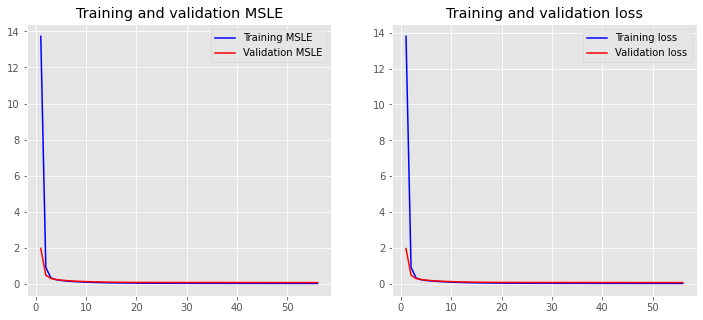

In [9]:
plot_history(history)

In [10]:
prediction = model.predict(X_test_scaled)

pred_frame = pd.DataFrame(y_test.copy())
pred_frame['prediction'] = prediction

print("R2 is:" + "  ", "{:.5f}".format(r2_score(y_test, prediction)))
print("MSLE is:", "{:.5f}".format(mean_squared_log_error(y_test, prediction)))
print("RMSE is:", "{:.5f}".format(mean_squared_error(y_test, prediction, squared=False)))
pred_frame.head(5)

R2 is:   0.89345
MSLE is: 0.07017
RMSE is: 2463.60143


,KWH,prediction
3506,19109,24110.310547
8808,6080,6826.036133
2871,12910,14673.387695
11489,27434,28313.191406
5208,27344,22725.500000


In [11]:
# saving model
model_path = "../output/models/"
filename = 'NN_model1'
tf.keras.models.save_model(model, model_path + filename)

2022-08-03 12:25:43.257038: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ../output/models/NN_model1/assets
